<a href="https://colab.research.google.com/github/neriandria/MachineLearning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install numpy pandas scikit-learn


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [18]:
df = pd.read_csv("Adult data.csv")

In [19]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Hours-per-week  32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [21]:
df.describe()

,Age,Fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
#Find rows with "?" values in Adult dataset
question_mark_rows = df[df.apply(lambda row: row.astype(str).str.contains('\?')).any(axis=1)]

print("Rows with '?' values in Adult dataset:")
print(question_mark_rows)

Rows with '?' values in Adult dataset:
       Age Workclass  Fnlwgt      Education  Education-num  \
14      40   Private  121772      Assoc-voc             11   
27      54         ?  180211   Some-college             10   
38      31   Private   84154   Some-college             10   
51      18   Private  226956        HS-grad              9   
61      32         ?  293936        7th-8th              4   
...    ...       ...     ...            ...            ...   
32530   35         ?  320084      Bachelors             13   
32531   30         ?   33811      Bachelors             13   
32539   71         ?  287372      Doctorate             16   
32541   41         ?  202822        HS-grad              9   
32542   72         ?  129912        HS-grad              9   

               Marital-status      Occupation    Relationship  \
14         Married-civ-spouse    Craft-repair         Husband   
27         Married-civ-spouse               ?         Husband   
38         Married-ci

In [23]:
# Check for null values and show details
null_values = df.isnull().sum()
print("Null values in the dataset:")
print(null_values)

Null values in the dataset:
Age               0
Workclass         0
Fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64


In [24]:
# Replace "?" values with mode of respective columns
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is categorical
        df[column] = df[column].replace(' ?', df[column].mode()[0])


In [25]:
print(df)
print(df.isnull().sum())


       Age          Workclass  Fnlwgt    Education  Education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Marital-status          Occupation    Relationship    Race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [26]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(columns=['Income'])
y = df['Income']

# Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [27]:
# Encode 'Income' column as True for '<=50K' and False for '>50K'
df['Income'] = df['Income'].astype(str).apply(lambda x: x.strip() == '<=50K')

In [28]:
print(df.head())

   Age          Workclass  Fnlwgt   Education  Education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        Marital-status          Occupation    Relationship    Race      Sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   Capital-gain  Capital-loss  Hours-per-week  Native-country  Income  
0          2174             0              40   United-States    Tru

In [29]:
# Find duplicate rows
duplicate_rows = df.duplicated()

# Print duplicate rows
print("Duplicate Rows:")
print(df[duplicate_rows])

# Remove duplicate rows
df_cleaned = df[~duplicate_rows]

# Print information about removed duplicates
print("\nNumber of duplicate rows removed:", sum(duplicate_rows))
print("Shape of the cleaned dataset:", df_cleaned.shape)


Duplicate Rows:
       Age          Workclass  Fnlwgt      Education  Education-num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th         

In [30]:
# Assuming df contains your preprocessed data

# Define features (X) and target (y)
X = df.drop('Income', axis=1)  # Features are all columns except 'Income'
y = df['Income']  # Target is the 'Income' column

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Train the RandomForestClassifier
rf_classifier.fit(X_train_encoded, y_train)

# Predictions
rf_pred = rf_classifier.predict(X_test_encoded)

# Evaluation
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))



Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.74      0.64      0.68      1571
        True       0.89      0.93      0.91      4942

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.80      6513
weighted avg       0.85      0.86      0.85      6513

Random Forest Accuracy: 0.857362198679564


In [33]:
# Model training
# Naïve Bayes Classification
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()

# Train the Naïve Bayes classifier
nb_classifier.fit(X_train_encoded, y_train)

# Predictions
nb_pred = nb_classifier.predict(X_test_encoded)

# Evaluation
print("Naïve Bayes Classification Report:")
print(classification_report(y_test, nb_pred))
print("Naïve Bayes Accuracy:", accuracy_score(y_test, nb_pred))


Naïve Bayes Classification Report:
              precision    recall  f1-score   support

       False       0.68      0.32      0.43      1571
        True       0.81      0.95      0.88      4942

    accuracy                           0.80      6513
   macro avg       0.75      0.64      0.66      6513
weighted avg       0.78      0.80      0.77      6513

Naïve Bayes Accuracy: 0.7991708889912482


In [44]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = df[numerical_columns].apply(zscore)

# Define a threshold for identifying outliers (e.g., Z-score > 3 or < -3)
threshold = 3

# Filter rows where any Z-score exceeds the threshold
outliers = df[(z_scores > threshold).any(axis=1)]

# Display the outliers
print("Outliers:")
print(outliers)

# Remove outliers from the dataset
df_cleaned = df.drop(outliers.index)

# Display the shape of the original and cleaned datasets
print("\nOriginal dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)


Outliers:
       Age   Workclass  Fnlwgt      Education  Education-num  \
10      37     Private  280464   Some-college             10   
23      43     Private  117037           11th              7   
28      39     Private  367260        HS-grad              9   
32      45     Private  386940      Bachelors             13   
37      19     Private  544091        HS-grad              9   
...    ...         ...     ...            ...            ...   
32494   82     Private  403910        HS-grad              9   
32511   25   Local-gov  514716      Bachelors             13   
32518   57   Local-gov  110417        HS-grad              9   
32525   81     Private  120478      Assoc-voc             11   
32531   30     Private   33811      Bachelors             13   

            Marital-status         Occupation    Relationship  \
10      Married-civ-spouse    Exec-managerial         Husband   
23      Married-civ-spouse   Transport-moving         Husband   
28                Divorced

Boxplots

Income range by gender

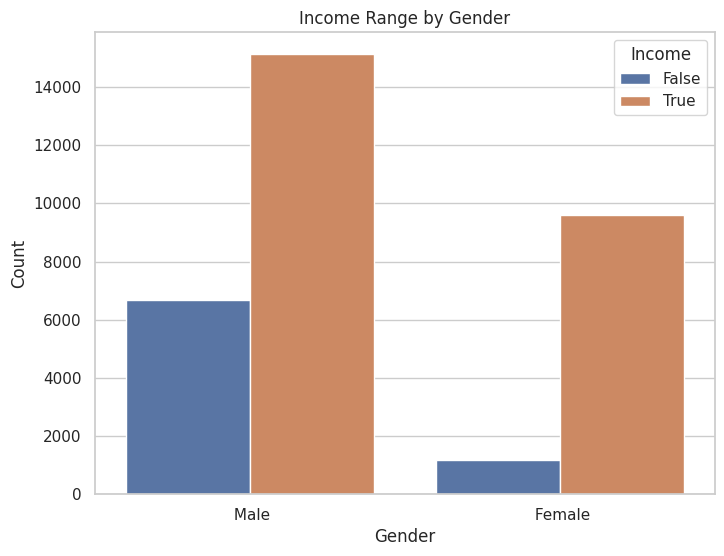

In [46]:
#True income >=50
#False income <=50
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sex', hue='Income')
plt.title('Income Range by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Distributions of ages

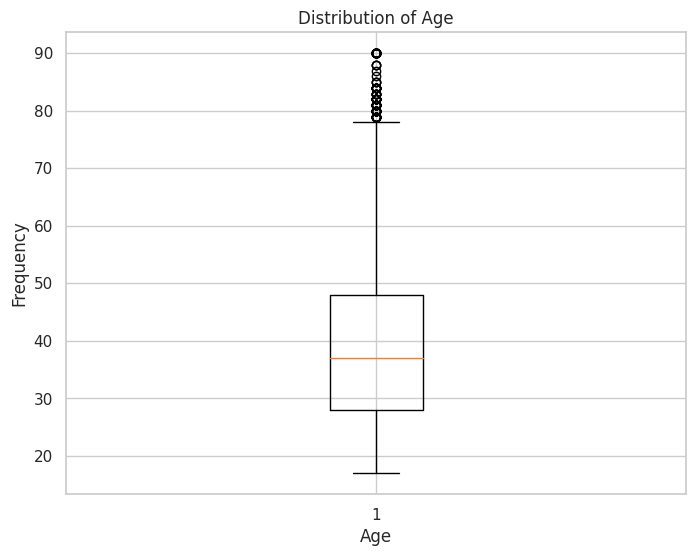

In [49]:
import matplotlib.pyplot as plt

# Create a boxplot for the 'Age' variable
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Distribution of education levels across different countries

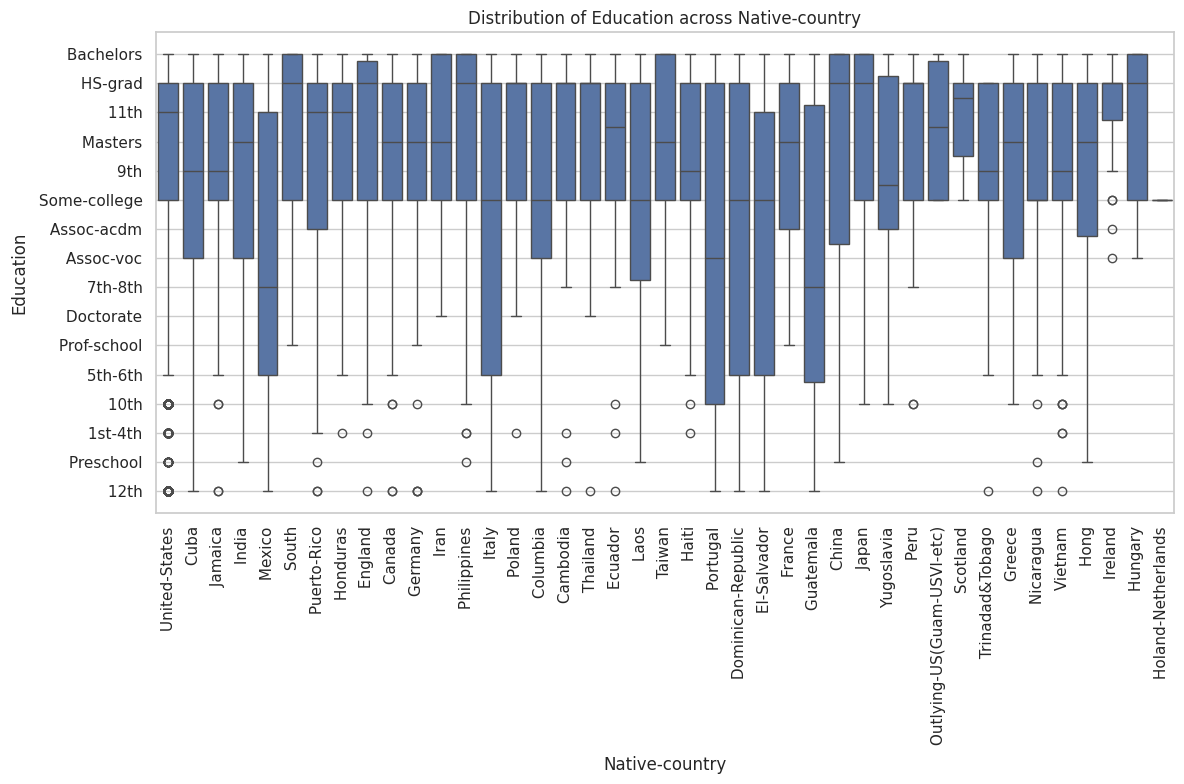

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot for Education across Native-country
plt.figure(figsize=(12, 8))
sns.boxplot(x='Native-country', y='Education', data=df)
plt.title('Distribution of Education across Native-country')
plt.xlabel('Native-country')
plt.ylabel('Education')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
